In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

root = '..'
lstm_comp_res = f'{root}/storage/skom/comparison/2021-07-19-14-56'
tcn_comp_res = f'{root}/storage/skom/comparison/2021-07-20-13-29'
sin_comp_res = f'{root}/storage/vals/comparison/2021-07-24-20-58'

pd.set_option('display.max_rows', 200)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray', labelsize=20)
plt.rc('ytick', direction='out', color='gray', labelsize=20)
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
from satprod.pipelines.evaluation import ModelEvaluation

## LSTM

In [92]:
lstmdf = pd.read_csv(f'{lstm_comp_res}/lstm_comparison.csv')
lstmdf = lstmdf.drop(columns=['Unnamed: 0'])
lstmdf = lstmdf.iloc[1:]

In [93]:
lstmdf

,lowest_valid_mae,features,params_in_network,trainable_params_in_network,linear_size,hidden_size,sequence_length
1,0.309064,"['production', 'speed']",13765,13765,64,48,5
2,0.301844,"['production', 'speed', 'direction', 'temporal']",23365,23365,64,64,5
3,0.303366,"['production', 'speed', 'direction']",8261,8261,64,32,13
4,0.300114,"['production', 'speed', 'direction', 'temporal']",19205,19205,128,48,13
5,0.300985,"['production', 'speed', 'direction', 'temporal']",28805,28805,128,64,13
6,0.300927,"['production', 'speed', 'direction']",11653,11653,128,32,29
7,0.310120,"['production', 'speed']",7365,7365,64,32,5
8,0.300702,"['production', 'speed', 'direction', 'temporal']",14789,14789,64,48,5
9,0.301304,"['production', 'speed', 'direction']",23365,23365,64,64,5
10,0.308344,"['production', 'speed']",10117,10117,128,32,13


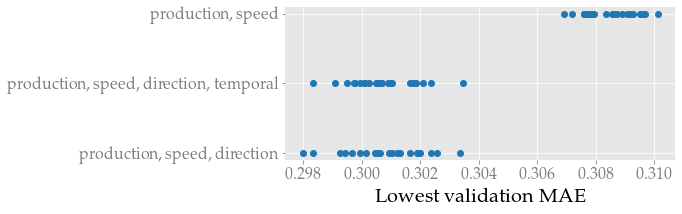

In [110]:
plt.figure(figsize=(10,3.5))
plt.scatter(
    lstmdf.sort_values(by=['lowest_valid_mae'])['lowest_valid_mae'],
    lstmdf.sort_values(by=['lowest_valid_mae'])['features'],
)
#plt.xticks(rotation=90)
plt.yticks([0,1,2], ['production, speed, direction',
                     'production, speed, direction, temporal',
                     'production, speed'])
plt.xlabel('Lowest validation MAE')
plt.tight_layout()
plt.savefig('feature_comp_lstm.png')
plt.show()

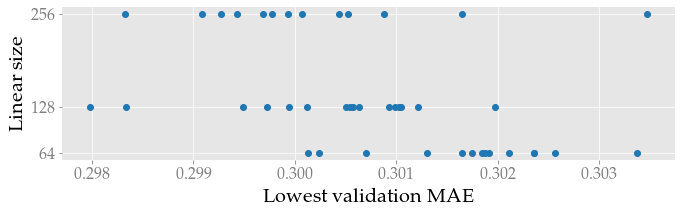

In [154]:
plt.figure(figsize=(10,3.5))
tmpdf = lstmdf[lstmdf['features']!="['production', 'speed']"]
#lstmdf[lstmdf['features']!="['production', 'speed']"]
plt.scatter(
    tmpdf['lowest_valid_mae'],
    tmpdf['linear_size']
)
plt.yticks([64,128,256],[64,128,256])
plt.ylabel('Linear size')
plt.xlabel('Lowest validation MAE')
plt.tight_layout()
plt.savefig('linear_size_comp_lstm.png')
plt.show()

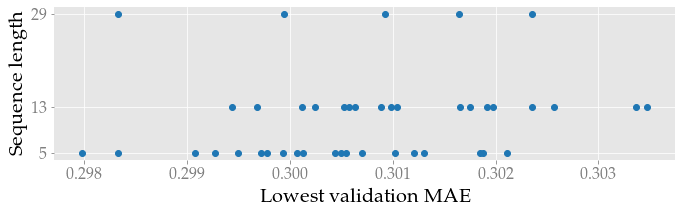

In [153]:
plt.figure(figsize=(10,3.5))
newtmpdf = tmpdf[tmpdf['linear_size']!=64]
'''plt.scatter(
    tmpdf[tmpdf['linear_size']!=64]['lowest_valid_mae'],
    tmpdf[tmpdf['linear_size']!=64]['sequence_length']
)'''
plt.scatter(
    tmpdf['lowest_valid_mae'],
    tmpdf['sequence_length']
)
plt.yticks([5,13,29],[5,13,29])
plt.ylabel('Sequence length')
plt.xlabel('Lowest validation MAE')
plt.tight_layout()
plt.savefig('sequence_length_comp_lstm.png')
plt.show()

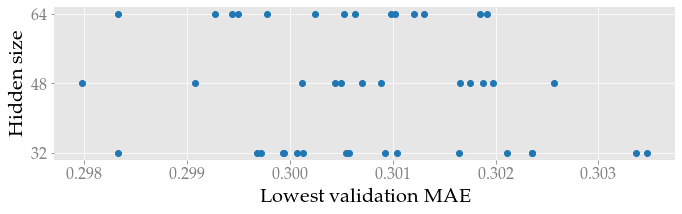

In [152]:
plt.figure(figsize=(10,3.5))
'''plt.scatter(
    newtmpdf[newtmpdf['sequence_length']!=13]['lowest_valid_mae'],
    newtmpdf[newtmpdf['sequence_length']!=13]['hidden_size']
)'''
plt.scatter(
    tmpdf['lowest_valid_mae'],
    tmpdf['hidden_size']
)
plt.yticks([32,48,64],[32,48,64])
plt.ylabel('Hidden size')
plt.xlabel('Lowest validation MAE')
plt.tight_layout()
plt.savefig('hidden_size_comp_lstm.png')
plt.show()

In [157]:
lstmdf.sort_values(by='lowest_valid_mae')

,lowest_valid_mae,features,params_in_network,trainable_params_in_network,linear_size,hidden_size,sequence_length
35,0.297979,"['production', 'speed', 'direction']",19205,19205,128,48,5
64,0.298326,"['production', 'speed', 'direction', 'temporal']",18437,18437,256,32,29
30,0.298331,"['production', 'speed', 'direction']",28805,28805,128,64,5
47,0.299079,"['production', 'speed', 'direction', 'temporal']",28037,28037,256,48,5
48,0.299267,"['production', 'speed', 'direction']",39685,39685,256,64,5
33,0.299431,"['production', 'speed', 'direction']",39685,39685,256,64,13
20,0.299492,"['production', 'speed', 'direction', 'temporal']",28805,28805,128,64,5
43,0.299681,"['production', 'speed', 'direction']",18437,18437,256,32,13
34,0.299721,"['production', 'speed', 'direction', 'temporal']",11653,11653,128,32,5
42,0.299776,"['production', 'speed', 'direction', 'temporal']",39685,39685,256,64,5


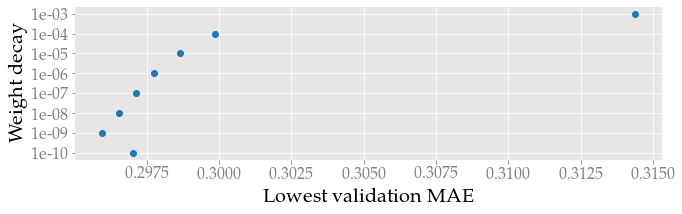

In [254]:
weight_decays = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
valid_maes = [0.29704761505126953,0.2959480583667755,0.29655352234840393,0.2971411645412445,0.297745943069458, 0.29865169525146484, 0.2998643219470978, 0.31438279151916504]
plt.figure(figsize=(10,3.5))
plt.scatter(valid_maes, weight_decays)
plt.yscale('log')
plt.ylabel('Weight decay')
plt.xlabel('Lowest validation MAE')
plt.yticks(weight_decays, ['1e-10', '1e-09', '1e-08', '1e-07', '1e-06', '1e-05', '1e-04', '1e-03'])
plt.tight_layout()
plt.savefig('weight_decay_1_comp_lstm.png')
plt.show()

## TCN

In [170]:
tcndf = pd.read_csv(f'{tcn_comp_res}/tcn_comparison.csv')
tcndf = tcndf.drop(columns=['Unnamed: 0'])
tcndf = tcndf[tcndf['features']!="['speed', 'direction']"]
tcndf = tcndf[tcndf['channels']!="[32]"]
#tcndf = lstmdf.iloc[1:]

In [171]:
tcndf

,lowest_valid_mae,features,params_in_network,trainable_params_in_network,channels,kernel_size,dropout,sequence_length
0,0.307906,"['production', 'speed', 'direction']",18433,18433,"[32, 32, 32]",3,0.2,29
2,0.306560,"['production', 'speed', 'direction']",18433,18433,"[32, 32, 32]",3,0.3,29
3,0.315527,"['production', 'speed', 'direction', 'temporal']",23681,23681,"[32, 32, 32]",4,0.1,43
4,0.311314,"['production', 'speed', 'direction', 'temporal']",23681,23681,"[32, 32, 32]",4,0.4,43
5,0.300150,"['production', 'speed', 'direction', 'temporal']",11105,11105,"[32, 32]",3,0.3,13
6,0.310130,"['production', 'speed', 'direction', 'temporal']",14305,14305,"[32, 32]",4,0.2,19
8,0.312116,"['production', 'speed', 'direction', 'temporal']",25761,25761,"[32, 32, 32, 32]",3,0.1,61
9,0.309548,"['production', 'speed', 'direction']",25761,25761,"[32, 32, 32, 32]",3,0.5,61
10,0.307895,"['production', 'speed', 'direction']",18433,18433,"[32, 32, 32]",3,0.2,29
11,0.309510,"['production', 'speed', 'direction', 'temporal']",18433,18433,"[32, 32, 32]",3,0.1,29


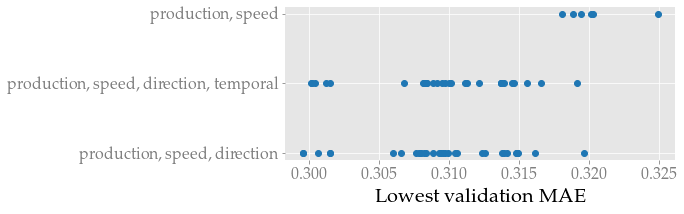

In [172]:
plt.figure(figsize=(10,3.5))
plt.scatter(
    tcndf['lowest_valid_mae'],
    tcndf['features'],
)
#plt.xticks(rotation=90)
plt.yticks([2,1,0], ['production, speed',
                     'production, speed, direction, temporal',
                     'production, speed, direction',
                     ])
plt.xlabel('Lowest validation MAE')
plt.tight_layout()
plt.savefig('feature_comp_tcn.png')
plt.show()

In [175]:
newdf = tcndf[tcndf['features']!="['production', 'speed']"]

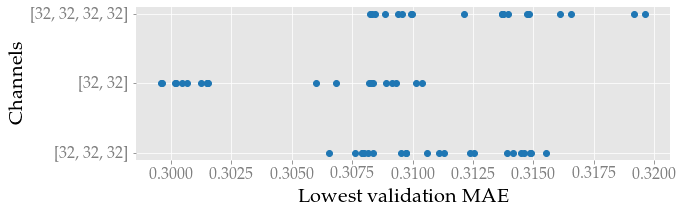

In [176]:
plt.figure(figsize=(10,3.5))
plt.scatter(
    newdf['lowest_valid_mae'],
    newdf['channels']
)
plt.ylabel('Channels')
plt.xlabel('Lowest validation MAE')
plt.tight_layout()
plt.savefig('channels_comp_tcn.png')
plt.show()

In [178]:
newdf2 = newdf2[newdf2['channels']!="[32, 32, 32, 32]"]
newdf2 = newdf2[newdf2['channels']!="[32, 32, 32]"]

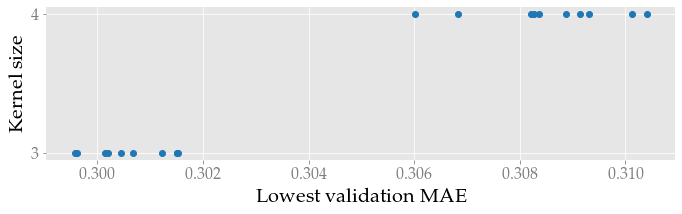

In [180]:
plt.figure(figsize=(10,3.5))
plt.scatter(
    newdf2['lowest_valid_mae'],
    newdf2['kernel_size']
)
plt.yticks([3.0,4.0], [3,4])
plt.ylabel('Kernel size')
plt.xlabel('Lowest validation MAE')
plt.tight_layout()
plt.savefig('kernel_size_comp_tcn.png')
plt.show()

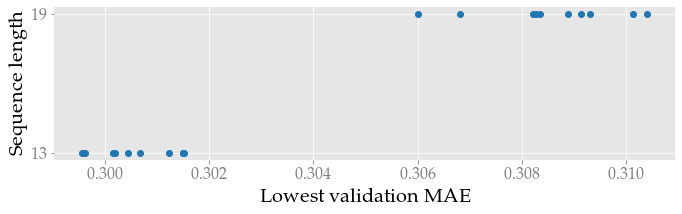

In [182]:
plt.figure(figsize=(10,3.5))
plt.scatter(
    newdf2['lowest_valid_mae'],
    newdf2['sequence_length']
)
plt.yticks([13,19], [13,19])
plt.ylabel('Sequence length')
plt.xlabel('Lowest validation MAE')
plt.tight_layout()
plt.savefig('sequence_length_comp_tcn.png')
plt.show()

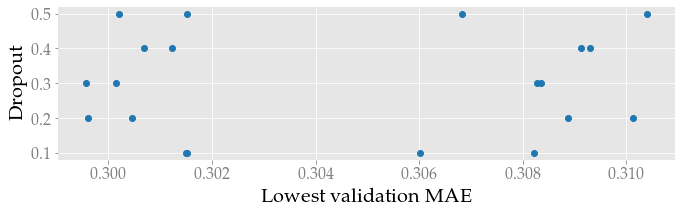

In [183]:
plt.figure(figsize=(10,3.5))
plt.scatter(
    newdf2['lowest_valid_mae'],
    newdf2['dropout']
)
plt.yticks([0.1,0.2,0.3,0.4,0.5], [0.1,0.2,0.3,0.4,0.5])
plt.ylabel('Dropout')
plt.xlabel('Lowest validation MAE')
plt.tight_layout()
plt.savefig('dropout_comp_tcn.png')
plt.show()

In [132]:
tcndf.sort_values(by='lowest_valid_mae')

,lowest_valid_mae,features,params_in_network,trainable_params_in_network,channels,kernel_size,dropout,sequence_length
15,0.299570,"['production', 'speed', 'direction']",11105,11105,"[32, 32]",3,0.3,13
74,0.299615,"['production', 'speed', 'direction']",11105,11105,"[32, 32]",3,0.2,13
5,0.300150,"['production', 'speed', 'direction', 'temporal']",11105,11105,"[32, 32]",3,0.3,13
45,0.300207,"['production', 'speed', 'direction', 'temporal']",11105,11105,"[32, 32]",3,0.5,13
64,0.300447,"['production', 'speed', 'direction', 'temporal']",11105,11105,"[32, 32]",3,0.2,13
35,0.300681,"['production', 'speed', 'direction']",11105,11105,"[32, 32]",3,0.4,13
25,0.301228,"['production', 'speed', 'direction', 'temporal']",11105,11105,"[32, 32]",3,0.4,13
54,0.301506,"['production', 'speed', 'direction']",11105,11105,"[32, 32]",3,0.1,13
44,0.301509,"['production', 'speed', 'direction', 'temporal']",11105,11105,"[32, 32]",3,0.1,13
55,0.301528,"['production', 'speed', 'direction']",11105,11105,"[32, 32]",3,0.5,13


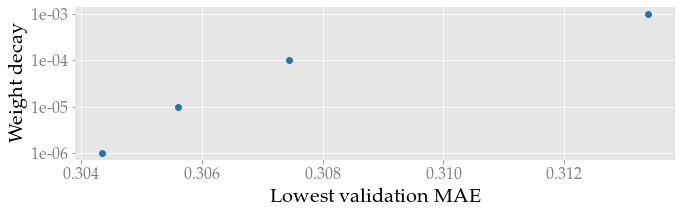

In [227]:
weight_decays = [1e-6, 1e-5, 1e-4, 1e-3]
valid_maes = [0.3043464720249176, 0.30559805035591125, 0.30744799971580505, 0.31338950991630554]
plt.figure(figsize=(10,3.5))
plt.scatter(valid_maes, weight_decays)
plt.yscale('log')
plt.ylabel('Weight decay')
plt.xlabel('Lowest validation MAE')
plt.yticks(weight_decays, ['1e-06', '1e-05', '1e-04', '1e-03'])
plt.tight_layout()
plt.savefig('weight_decay_1_comp_tcn.png')
plt.show()

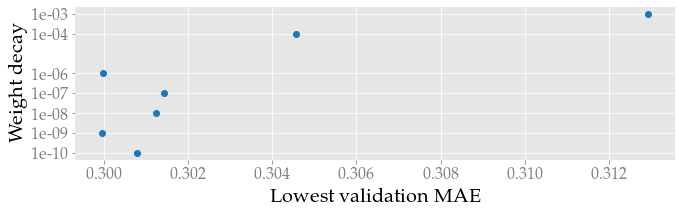

In [255]:
weight_decays = [1e-04, 1e-03, 1e-08, 1e-10, 1e-07, 1e-09, 1e-06]
valid_maes = [
    0.3045685589313507,
    0.3129275441169739,
    0.30124691128730774,
    0.30078747868537903,
    0.3014395534992218,
    0.2999674081802368,
    0.2999882400035858,
]
plt.figure(figsize=(10,3.5))
plt.scatter(valid_maes, weight_decays)
plt.yscale('log')
plt.ylabel('Weight decay')
plt.xlabel('Lowest validation MAE')
plt.yticks(weight_decays, ['1e-04', '1e-03', '1e-08', '1e-10', '1e-07', '1e-09', '1e-06'])
plt.tight_layout()
plt.savefig('weight_decay_2_comp_tcn.png')
plt.show()
# unstable training when wd > 1e-06

## SIN

In [57]:
sindf = pd.read_csv(f'{sin_comp_res}/sin_comparison.csv')
sindf = sindf.drop(columns=['Unnamed: 0', 'features', 'params_in_network', 'trainable_params_in_network'])

In [58]:
sindf

,lowest_valid_mae,weight_decay,crop,dropout
0,0.342684,0.00001,True,0.3
1,0.338497,0.00010,False,0.5
2,0.342098,0.00010,True,0.3
3,0.338818,0.00010,False,0.5
4,0.341058,0.00001,True,0.5
5,0.340035,0.00010,True,0.3
6,0.336724,0.00010,False,0.3
7,0.351106,0.00001,True,0.5
8,0.331268,0.00001,False,0.5
9,0.346105,0.00001,True,0.5


/Users/jorgentaule/.pyenv/versions/anaconda3-5.3.1/envs/satprod/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jorgentaule/.pyenv/versions/anaconda3-5.3.1/envs/satprod/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/jorgentaule/.pyenv/versions/anaconda3-5.3.1/envs/satprod/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/Users/jorgentaule/.pyenv/versions/anaconda3-5.3.1/envs/satprod/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


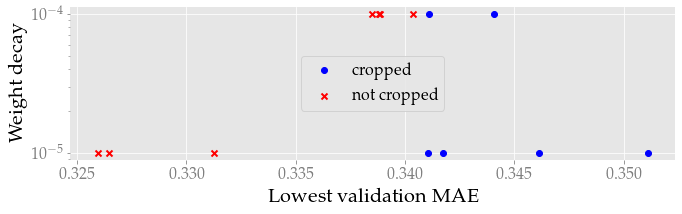

In [63]:
plt.figure(figsize=(10,3.5))
plt.scatter(
    sindf[sindf['crop']==True][sindf['dropout']==0.5]['lowest_valid_mae'],
    sindf[sindf['crop']==True][sindf['dropout']==0.5]['weight_decay'],
    color='b',
    label='cropped'
)
'''plt.scatter(
    sindf[sindf['crop']==True][sindf['dropout']==0.3]['lowest_valid_mae'],
    sindf[sindf['crop']==True][sindf['dropout']==0.3]['weight_decay'],
    color='b',
    marker='v',
    label='cropped, dropout 0.3'
)'''
plt.scatter(
    sindf[sindf['crop']==False][sindf['dropout']==0.5]['lowest_valid_mae'],
    sindf[sindf['crop']==False][sindf['dropout']==0.5]['weight_decay'],
    color='r',
    marker='x',
    label='not cropped'
)
'''plt.scatter(
    sindf[sindf['crop']==False][sindf['dropout']==0.3]['lowest_valid_mae'],
    sindf[sindf['crop']==False][sindf['dropout']==0.3]['weight_decay'],
    color='r',
    marker='s',
    label='not cropped, dropout 0.3'
)'''
plt.yscale('log')
plt.ylabel('Weight decay')
plt.xlabel('Lowest validation MAE')
plt.legend(loc='center')
plt.tight_layout()
plt.savefig('weight_decay_SIN.png')
plt.show()

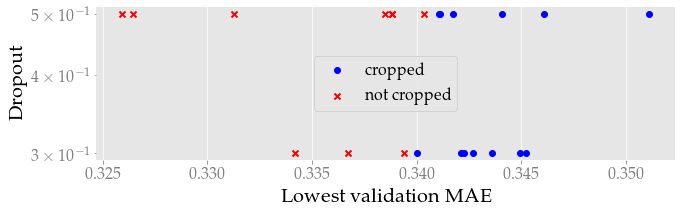

In [59]:
plt.figure(figsize=(10,3.5))
plt.scatter(
    sindf[sindf['crop']==True]['lowest_valid_mae'],
    sindf[sindf['crop']==True]['dropout'],
    color='b',
    label='cropped'
)
plt.scatter(
    sindf[sindf['crop']==False]['lowest_valid_mae'],
    sindf[sindf['crop']==False]['dropout'],
    color='r',
    marker='x',
    label='not cropped'
)
plt.yscale('log')
plt.ylabel('Dropout')
plt.xlabel('Lowest validation MAE')
plt.legend(loc='center')
plt.tight_layout()
plt.savefig('dropout_SIN.png')
plt.show()

In [214]:
sindf.sort_values(by=['weight_decay', 'crop'])

,lowest_valid_mae,weight_decay,crop
8,0.331268,0.00001,False
15,0.325937,0.00001,False
20,0.326466,0.00001,False
0,0.342684,0.00001,True
4,0.341058,0.00001,True
7,0.351106,0.00001,True
9,0.346105,0.00001,True
11,0.343599,0.00001,True
14,0.342260,0.00001,True
21,0.341720,0.00001,True


In [238]:
crop_0001 = sindf[sindf['crop']==True][sindf['weight_decay']==0.0001]['lowest_valid_mae'].values

/Users/jorgentaule/.pyenv/versions/anaconda3-5.3.1/envs/satprod/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [240]:
nocrop_0001 = sindf[sindf['crop']==False][sindf['weight_decay']==0.0001]['lowest_valid_mae'].values

/Users/jorgentaule/.pyenv/versions/anaconda3-5.3.1/envs/satprod/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [241]:
crop_00001 = sindf[sindf['crop']==True][sindf['weight_decay']==0.00001]['lowest_valid_mae'].values

/Users/jorgentaule/.pyenv/versions/anaconda3-5.3.1/envs/satprod/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [242]:
nocrop_00001 = sindf[sindf['crop']==False][sindf['weight_decay']==0.00001]['lowest_valid_mae'].values

/Users/jorgentaule/.pyenv/versions/anaconda3-5.3.1/envs/satprod/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [249]:
crop = sindf[sindf['crop']==True]['lowest_valid_mae'].values
nocrop = sindf[sindf['crop']==False]['lowest_valid_mae'].values

In [252]:
crop_0001.mean(), nocrop_0001.mean(), crop_00001.mean(), nocrop_00001.mean(), crop.mean(), nocrop.mean()

(0.34290993213653564,
 0.3381135080541883,
 0.3440761864185333,
 0.3278906047344208,
 0.3435379152114575,
 0.33504663705825805)

In [244]:
from scipy import stats

In [245]:
stats.ttest_ind(crop_0001, nocrop_0001)

Ttest_indResult(statistic=4.11442073326778, pvalue=0.0017168630972417781)

In [246]:
stats.ttest_ind(crop_00001, nocrop_00001)

Ttest_indResult(statistic=6.957911604866196, pvalue=0.0001174823787354155)

In [250]:
stats.ttest_ind(crop, nocrop)

Ttest_indResult(statistic=4.855091503028036, pvalue=8.445206242303045e-05)

## SIN predictions as features

In [257]:
sinfeat_comp_res = f'{root}/storage/vals/comparison/2021-07-24-13-09'

In [297]:
sinfeatdf = pd.read_csv(f'{sinfeat_comp_res}/sin_comparison.csv')
sinfeatdf = sinfeatdf.drop(columns=['Unnamed: 0', 'params_in_network', 'trainable_params_in_network'])
lstmfeatdf = pd.read_csv(f'{sinfeat_comp_res}/lstm_comparison.csv')
lstmfeatdf = lstmfeatdf.drop(columns=['Unnamed: 0'])
lstmspeed = lstmfeatdf[lstmfeatdf['features']=="['speed']"]
lstmfeatdf = lstmfeatdf[lstmfeatdf['features']!="['speed']"]
tcnfeatdf = pd.read_csv(f'{sinfeat_comp_res}/tcn_comparison.csv')
tcnfeatdf = tcnfeatdf.drop(columns=['Unnamed: 0'])
tcnfeatdf = tcnfeatdf[tcnfeatdf['lowest_valid_mae']<0.8]
tcnfeatdf['features'] = tcnfeatdf['features'].str.replace('_','-')
lstmfeatdf['features'] = lstmfeatdf['features'].str.replace('_','-')
sinfeatdf['features'] = sinfeatdf['features'].str.replace('_','-')

In [278]:
sinfeatdf

,lowest_valid_mae,features,weight_decay,crop
0,0.378069,['speed'],0.00000,False
1,0.325937,[],0.00001,False


In [298]:
lstmspeed

,lowest_valid_mae,features,params_in_network,trainable_params_in_network,linear_size,hidden_size,sequence_length
6,0.377721,['speed'],418,418,4,8,1


In [ ]:
# MLR '2021-07-23-21-22'
# SIN '2021-07-24-04-45'
# SIN img '2021-07-21-13-58'
# LSTM '2021-07-24-04-05'

In [3]:
%%capture
model_name = 'SIN'
timestamp = '2021-07-21-13-58' # '2021-07-21-13-58', '2021-07-21-13-59'
park = 'vals'
sorting = 'img'
sinimg = ModelEvaluation(timestamp=timestamp, model_name=model_name, park=park, sorting=sorting)

In [4]:
%%capture
model_name = 'SIN'
timestamp = '2021-07-24-04-45' # '2021-07-21-13-58', '2021-07-21-13-59'
park = 'vals'
sorting = 'num'
sinlin = ModelEvaluation(timestamp=timestamp, model_name=model_name, park=park, sorting=sorting)

In [5]:
%%capture
model_name = 'MLR'
timestamp = '2021-07-23-21-22' # '2021-07-21-13-58', '2021-07-21-13-59'
park = 'vals'
sorting = 'num'
mlr = ModelEvaluation(timestamp=timestamp, model_name=model_name, park=park, sorting=sorting)

In [6]:
%%capture
model_name = 'LSTM'
timestamp = '2021-07-24-04-05' # '2021-07-21-13-58', '2021-07-21-13-59'
park = 'vals'
sorting = 'num'
lstm = ModelEvaluation(timestamp=timestamp, model_name=model_name, park=park, sorting=sorting)

In [35]:
targs = sinimg.valid_targs_unscaled[:, -1, :].squeeze()

In [36]:
sinimgpreds = sinimg.valid_preds_unscaled[:, -1, :].squeeze()

In [37]:
sinlinpreds = sinlin.valid_preds_unscaled[:, -1, :].squeeze()

In [38]:
mlrpreds = mlr.valid_preds_unscaled[:, -1, :].squeeze()

In [39]:
lstmpreds = lstm.valid_preds_unscaled[:, -1, :].squeeze()

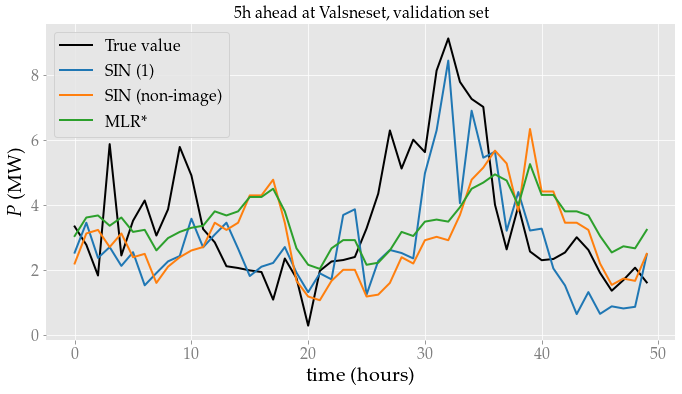

In [53]:
plt.figure(figsize=(10,6))
plt.plot(targs[:50], label=r'True value', color='k')
plt.plot(sinimgpreds[:50], label='SIN (1)')
plt.plot(sinlinpreds[:50], label='SIN (non-image)')
plt.plot(mlrpreds[:50], label='MLR*')
#plt.plot(lstmpreds[:50], label='LSTM')
plt.ylabel(r'$P$ (MW)')
plt.xlabel('time (hours)')
plt.title(f'5h ahead at Valsneset, validation set')
plt.legend()
plt.tight_layout()
plt.savefig('simple_models_fitting.png')
plt.show()

In [50]:
models = {'SIN (1)': sinimg.valid_error_matrix[-5:],
          'SIN (non-image)': sinlin.valid_error_matrix[-5:],
          'MLR*': mlr.valid_error_matrix[-5:],
          #'LSTM*': lstm.valid_error_matrix
          }

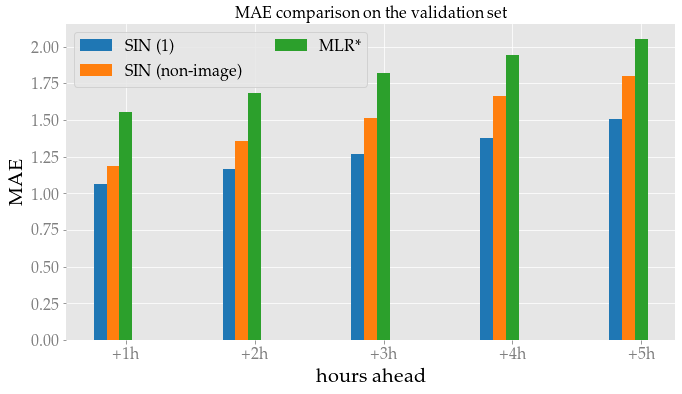

In [54]:
dataset_name='valid'
width = 0.1  # the width of the bars
labels = ['+1h', '+2h', '+3h', '+4h', '+5h']

x_axis = []
x_axis.append(np.arange(len(labels)))  # the label locations
for i in range(len(models.keys())-1):
    x_axis.append([r + width for r in x_axis[-1]])

fig, ax = plt.subplots()
fig.set_size_inches(10,6)
rects = []

for i, (key, value) in enumerate(models.items()):
    rects.append(ax.bar(x_axis[i], np.ravel(value), width, label=key))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MAE')
ax.set_xlabel('hours ahead')
dataset_name_name = dataset_name
if dataset_name_name=='valid':
    dataset_name_name = 'validation'
ax.set_title(f'MAE comparison on the {dataset_name_name} set')
ax.set_xticks(x_axis[-1])
ax.set_xticklabels(labels)
#ax.legend()
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.legend(loc='upper left', ncol=2)
plt.tight_layout()
plt.savefig(f'speed_comparison_valid.png')
plt.show()

In [279]:
lstmfeatdf

,lowest_valid_mae,features,params_in_network,trainable_params_in_network,linear_size,hidden_size,sequence_length
0,0.295742,"['production', 'speed', 'direction', 'SIN-vals']",41221,41221,256,64,5
1,0.296139,"['production', 'speed', 'direction', 'SIN-vals']",41221,41221,256,64,5
2,0.235404,"['production', 'speed', 'direction']",39685,39685,256,64,5
3,0.236455,"['production', 'speed', 'direction']",39685,39685,256,64,5
4,0.294441,"['production', 'speed', 'direction', 'SIN-vals']",41221,41221,256,64,5
5,0.296471,"['production', 'speed', 'direction', 'SIN-vals']",41221,41221,256,64,5
7,0.235676,"['production', 'speed', 'direction']",39685,39685,256,64,5
8,0.235897,"['production', 'speed', 'direction']",39685,39685,256,64,5


In [280]:
tcnfeatdf

,lowest_valid_mae,features,params_in_network,trainable_params_in_network,channels,kernel_size,dropout,sequence_length
0,0.285261,"['production', 'speed', 'direction', 'SIN-vals']",42945,42945,"[64, 64]",3,0.2,13
1,0.284776,"['production', 'speed', 'direction', 'SIN-vals']",42945,42945,"[64, 64]",3,0.2,13
2,0.247489,"['production', 'speed', 'direction']",42689,42689,"[64, 64]",3,0.2,13
3,0.248258,"['production', 'speed', 'direction']",42689,42689,"[64, 64]",3,0.2,13
5,0.288177,"['production', 'speed', 'direction', 'SIN-vals']",42945,42945,"[64, 64]",3,0.2,13
6,0.283467,"['production', 'speed', 'direction', 'SIN-vals']",42945,42945,"[64, 64]",3,0.2,13
7,0.247804,"['production', 'speed', 'direction']",42689,42689,"[64, 64]",3,0.2,13
8,0.249170,"['production', 'speed', 'direction']",42689,42689,"[64, 64]",3,0.2,13


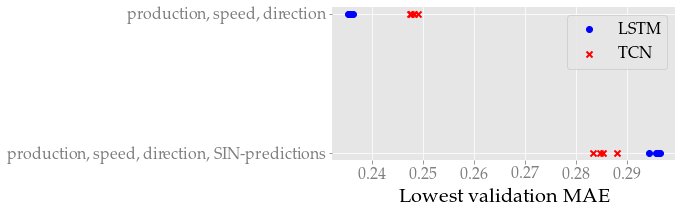

In [282]:
plt.figure(figsize=(10,3.5))
plt.scatter(
    lstmfeatdf['lowest_valid_mae'],
    lstmfeatdf['features'],
    color='b',
    label='LSTM'
)
plt.scatter(
    tcnfeatdf['lowest_valid_mae'],
    tcnfeatdf['features'],
    color='r',
    marker='x',
    label='TCN'
)
#plt.xticks(rotation=90)
plt.yticks([0,1], ['production, speed, direction, SIN-predictions',
                     'production, speed, direction'])
plt.xlabel('Lowest validation MAE')
plt.legend()
plt.tight_layout()
plt.savefig('sin_features_comp.png')
plt.show()

In [287]:
lstm_sin = lstmfeatdf[
    lstmfeatdf['features']=="['production', 'speed', 'direction', 'SIN-vals']"]['lowest_valid_mae'].values
lstm_nosin = lstmfeatdf[
    lstmfeatdf['features']=="['production', 'speed', 'direction']"]['lowest_valid_mae'].values
tcn_sin = tcnfeatdf[
    tcnfeatdf['features']=="['production', 'speed', 'direction', 'SIN-vals']"]['lowest_valid_mae'].values
tcn_nosin = tcnfeatdf[
    tcnfeatdf['features']=="['production', 'speed', 'direction']"]['lowest_valid_mae'].values

<Figure size 1152x252 with 0 Axes>

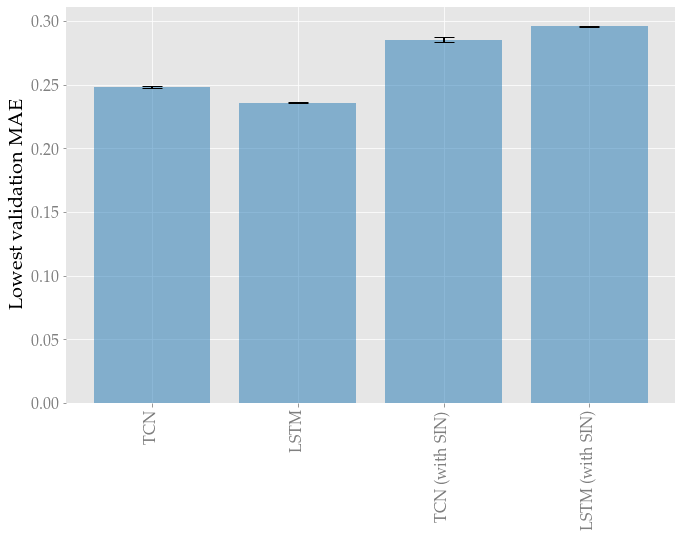

In [296]:
plt.figure(figsize=(16,3.5))

# Create lists for the plot
labels = ['TCN', 'LSTM', 'TCN (with SIN)', 'LSTM (with SIN)']
x_pos = np.arange(len(labels))
CTEs = [tcn_nosin.mean(), lstm_nosin.mean(), tcn_sin.mean(), lstm_sin.mean()]
error = [tcn_nosin.std(), lstm_nosin.std(), tcn_sin.std(), lstm_sin.std()]

# Build the plot
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Lowest validation MAE')
ax.set_xticks(x_pos)
plt.xticks(rotation=90)
ax.set_xticklabels(labels)
#ax.set_title('Coefficent of Thermal Expansion (CTE) of Three Metals')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()